In [0]:
import pandas as pd
import numpy as np

In [0]:
full_dataset = pd.read_csv('//content/drive/My Drive/Colab_Data/0306/50k1k/k_mean_PART1_CREDBANK_with_cred.csv')
test_dataset = pd.read_csv('/content/drive/My Drive/Colab_Data/0306/test_dataset_with_avg_cred.csv')

In [3]:
full_dataset.loc[0]

text                         RT @EWNsport: The West Indies Cricket Board ha...
id                                                                 5.23159e+17
author_id                                                          3.28243e+07
created_at                                                 2014-10-17 17:08:10
in_reply_to_status_id_str                                                  NaN
in_reply_to_user_id_str                                                    NaN
in_reply_to_screen_name                                                    NaN
quoted_status_id_str                                                      None
retweet_id                                                  523137164859965440
retweet_author_id                                                    242308246
topic                                                       ebola,obama,#ebola
topic_key                    ebola_obama_#ebola-20141016_181953-20141016_19...
topic_terms                                    [u'eb

In [4]:
#turn text into vector vby word2vec
import numpy as np
import pandas as pd
import gensim
import time
import statistics as st

from gensim import corpora
from pprint import pprint
from gensim.models import Word2Vec
from collections import Counter

import numpy as np 
import nltk 
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer    
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer 

#########################################################################################################
#vectorization of sentence 
def sent_vectorizer(sent):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            sent_vec.append(model[w])
        except:
            pass
     
    return sent_vec


#########################################################################################################
#lemmatization od sentence 
def lemmatization(text):
    return [lemmatizer.lemmatize(w) for w in text]
#########################################################################################################
#stemming word  
def stemmeriation(text):
    return [ps.stem(w) for w in text]
    

#########################################################################################################
#print each sentence 
def sent_print(sent):
    print(sent)


#text pre-processing
not_words = ['!','@','?',',','.',"'", ')',';','(', '/',':','-','&','*','"','\'','\"','...','..','=]','=[','rt']

tweet_dataset = full_dataset[['id','text']]
tweet_dataset2 = test_dataset[['id','text']]
tweet_tokenizer = TweetTokenizer()
tweet_tokens = []
for sent in tweet_dataset['text']:
    tweet_tokens.append(tweet_tokenizer.tokenize(str(sent).lower()))
tweet_dataset['tokenized_text'] = tweet_tokens

tweet_tokens = []
for sent in tweet_dataset2['text']:
    tweet_tokens.append(tweet_tokenizer.tokenize(str(sent).lower()))  
tweet_dataset2['tokenized_text'] = tweet_tokens

tweet_dataset['tokenized_text'] = tweet_dataset['tokenized_text'].apply(lambda x: [item for item in x if item not in not_words])
tweet_dataset2['tokenized_text'] = tweet_dataset2['tokenized_text'].apply(lambda x: [item for item in x if item not in not_words])

for sentence in tweet_dataset['tokenized_text']: 
    num_to_del = 0
    for word in sentence:
        if '@' in word: 
            num_to_del +=1
    for i in range(0,num_to_del):
        for word in sentence:
            if '@' in word: 
                sentence.remove(word)  
                
for sentence in tweet_dataset['tokenized_text']: 
    num_to_del = 0
    for word in sentence:
        if 'http' in word: 
            num_to_del +=1
    for i in range(0,num_to_del):
        for word in sentence:
            if 'http' in word: 
                sentence.remove(word)

#remove stop words
stop_words = set(stopwords.words('english')) 
tweet_dataset['text_without_stop_word'] = tweet_dataset['tokenized_text'].apply(lambda x: [item for item in x if item not in stop_words])
tweet_dataset2['text_without_stop_word'] = tweet_dataset2['tokenized_text'].apply(lambda x: [item for item in x if item not in stop_words])
#stem
ps = PorterStemmer() 
tweet_dataset['stemmed_text'] = tweet_dataset['text_without_stop_word'].apply(stemmeriation)
tweet_dataset2['stemmed_text'] = tweet_dataset2['text_without_stop_word'].apply(stemmeriation)

#lemma
lemmatizer = WordNetLemmatizer() 
tweet_dataset['lemmatized_text'] = tweet_dataset['stemmed_text'].apply(lemmatization)
tweet_dataset2['lemmatized_text'] = tweet_dataset2['stemmed_text'].apply(lemmatization)


#build word2vec model and run on each sentences 
model = Word2Vec(tweet_dataset['lemmatized_text'], min_count=1,size= 32) 
#tweet_dataset['vector_text'] = np.array([model[word] for word in (model.wv.vocab)])
tweet_dataset['vector_text'] = tweet_dataset['lemmatized_text'].apply(sent_vectorizer)
tweet_dataset2['vector_text'] = tweet_dataset2['lemmatized_text'].apply(sent_vectorizer)


############################################################################################
#get the avg vector of all vectors in a sentence 
def avg_vector(vect_list):
  return np.mean(vect_list, axis=0)

full_dataset['avg_vector_text'] = tweet_dataset['vector_text'].apply(avg_vector)
test_dataset['avg_vector_text'] = tweet_dataset2['vector_text'].apply(avg_vector)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [5]:
print(full_dataset['part1_gp'].max())
gp_no = full_dataset['part1_gp'].max() + 1

3.0


In [6]:
#find the avg of each part_1 cluster
cluster_avg_list= []

for i in range(int(gp_no)):
  cluster = {}
  tmp_df = full_dataset.loc[full_dataset['part1_gp'] == i]
  cluster['gp'] = i
  cluster['avg_cred'] = tmp_df['avg_cred'].mean()
  cluster['vector_text'] = np.mean(tmp_df['avg_vector_text'], axis=0)
  cluster_avg_list.append(cluster)

cluster_avg_list

[{'avg_cred': 1.9160129410978173,
  'gp': 0,
  'vector_text': array([-0.6012176 ,  0.64073145, -0.97617966, -0.88037366, -0.42137703,
         -0.26285276,  0.19215535,  0.90577567, -0.5461982 ,  0.2601638 ,
         -0.1103292 , -0.5210664 , -0.19678713, -0.12484433, -0.34453493,
          0.9413734 ,  0.89808565, -0.05933886, -2.2858796 , -0.00422704,
         -1.3304263 ,  0.37016588,  0.8486145 ,  0.68812716,  1.231857  ,
          0.71177226,  1.23936   , -0.50829715,  1.3695319 ,  1.6045274 ,
          0.20028533, -0.6040871 ], dtype=float32)},
 {'avg_cred': 1.8779510418058025,
  'gp': 1,
  'vector_text': array([-9.4390798e-01,  6.9771343e-01, -1.4765527e-02, -1.2702520e+00,
         -6.7228860e-01, -1.0491701e+00, -4.5218375e-02,  1.5507742e+00,
         -5.0829154e-01, -4.5964932e-01, -3.8491210e-01, -4.8915648e-01,
         -3.2647374e-01,  3.9432175e-02,  1.3395390e-01,  9.7279048e-01,
          4.4802076e-01, -5.2327329e-01, -2.5036905e+00,  6.2208724e-01,
         -1.772858

In [7]:
#find the cosin distace between the test_set and  avg of each cluster 
import numpy

def get_shortest_cluster(tweet):
  distance_list = []
  for cluster in cluster_avg_list:
    cosine_similarity = numpy.dot(tweet.avg_vector_text, cluster['vector_text'])/(numpy.linalg.norm(tweet.avg_vector_text)* numpy.linalg.norm(cluster['vector_text']))
    #time_different  = abs(tweet.time_stamp -cluster['time_stamp'] )
    distance_list.append(cosine_similarity)
    #print(time_different)
#  print(distance_list)
    try:
      min_value = min(distance_list)
    except:
      print(distance_list)
      return 0
    
  return distance_list.index((min_value))


test_dataset['pred_gp'] = test_dataset.apply(get_shortest_cluster,axis=1)
print(test_dataset['pred_gp'])


[array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan]), array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan])]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]


0      3
1      3
2      0
3      0
4      0
      ..
733    3
734    3
735    3
736    0
737    3
Name: pred_gp, Length: 738, dtype: int64


In [0]:
#assgin the cred_class on the test dataset's original cred and pred's cred
def get_cred_class(cred):
  if cred > 1.5:
    return 2
  if cred > 1:
    return 1
  return 0
  
cluster_cred_list = []

for cluster in cluster_avg_list:
    cluster_cred_list.append(cluster['avg_cred'])

def get_pred_cred_class(gp):
  for i in range(len(cluster_cred_list)):
    if gp == i:
      return get_cred_class(cluster_cred_list[i])

test_dataset['cred_class'] = test_dataset['avg_cred'].apply(get_cred_class)
test_dataset['pred_cred_class'] = test_dataset['pred_gp'].apply(get_pred_cred_class)


In [9]:
test_dataset['avg_cred'].min()
#test_dataset['pred_cred_class']

0.6666666666666666

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


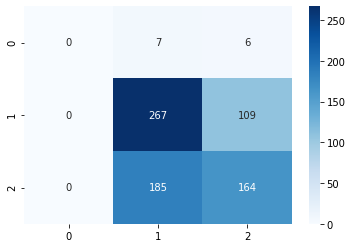

Accuracy Score : 0.5840108401084011
Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.58      0.71      0.64       376
           2       0.59      0.47      0.52       349

    accuracy                           0.58       738
   macro avg       0.39      0.39      0.39       738
weighted avg       0.57      0.58      0.57       738



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
#confusion marix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

cm = confusion_matrix(test_dataset['cred_class'],test_dataset['pred_cred_class'])
sn.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.show()
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

print ('Accuracy Score :',accuracy_score(test_dataset['cred_class'], test_dataset['pred_cred_class'])) 
print ('Report : ')
print (classification_report(test_dataset['cred_class'], test_dataset['pred_cred_class']) )